In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline

# For linear regression, we will need
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In this lab, we will use Boston house prices dataset. You can load the dataset by running the cell below. 

Here are you tasks:
1. Basic EDA
2.a. Build a simple linear regression model (using only one feature) to predict the house price, <br>
b. determine your model's applicability (R^2) and accuracy (MSE) both for training and testing, and <br> 
c. Visualize ground-truth vs. prediction.
3. a. Build a linear regression model with two features to to predict the house price, <br>
b. determine your model's applicability (R^2) and accuracy (MSE) both for training and testing, and <br> 
c. Visualize ground-truth vs. prediction.
4. Repeat task-3(a) with linear algebra

Use 80/20 train-test split.

In [2]:
# load the housing data from the scikit-learn library
from sklearn.datasets import load_boston
boston_dataset = load_boston()

# create a dataframe 
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

#  the target value MEDV is missing from the data. 
# create a new column of target values and add it to the dataframe
boston['MEDV'] = boston_dataset.target

# check this link for more
# https://scikit-learn.org/stable/datasets/toy_dataset.html

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [4]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# The target value MEDV is missing from the data. 
# Create a new column of target values and add it to the dataframe

In [6]:
# load the data into a pandas dataframe using pd.DataFrame
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


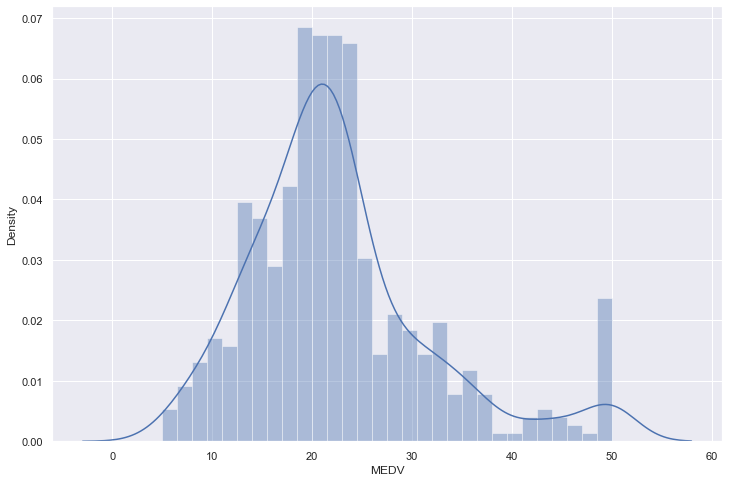

In [8]:
sns.set(rc={'figure.figsize':(12,8)})
sns.distplot(boston['MEDV'], bins=30) 
# Change distplot to displot or histplot as distplot will be depracated in future versions
plt.show()

<AxesSubplot:>

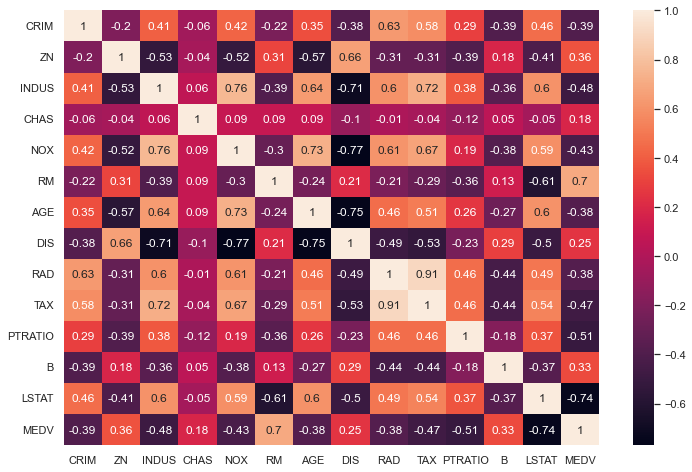

In [9]:
# let's look at the correlation among columns
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True);

Build a simple linear regression model (x = one of the features, y = medv)

In [10]:
# Preparing the data for training the model
X = boston['RM'].values.reshape(-1, 1)
Y = boston['MEDV'].values.reshape(-1, 1)

# In machine learning you will typically divide your dataset into a training and a test sample.
# The training sample is typically 80% to the test sample of 20%.
# The split can be done manually or using the train_test_split function.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=17)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404, 1)
(102, 1)


In [11]:
simple_lin_model = LinearRegression()
simple_lin_model.fit(X_train, Y_train)

LinearRegression()

In [12]:
# Model evaluation for training set
y_train_predict = simple_lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 6.8551713886879435
R2 score is 0.472468924250401




In [13]:
# Model evaluation for testing set
y_test_predict = simple_lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 5.492615330956987
R2 score is 0.5425677190494489


To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

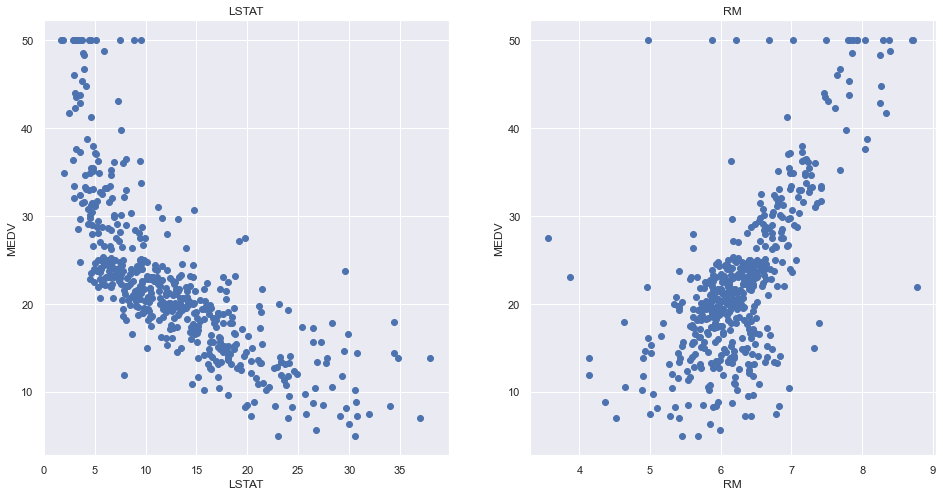

In [15]:
plt.figure(figsize=(16, 8))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [16]:
# numpy.c_ translates slice objects to concatenation along the second axis.
# Preparing the data for training the model
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO']], columns = ['LSTAT','RM','PTRATIO'])
Y = boston['MEDV']

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=17)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 3)
(102, 3)
(404,)
(102,)


In [18]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [19]:
# Model evaluation
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 5.236640299932028
R2 score is 0.692165776488683




In [20]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 5.14383524084026
R2 score is 0.598816984018886


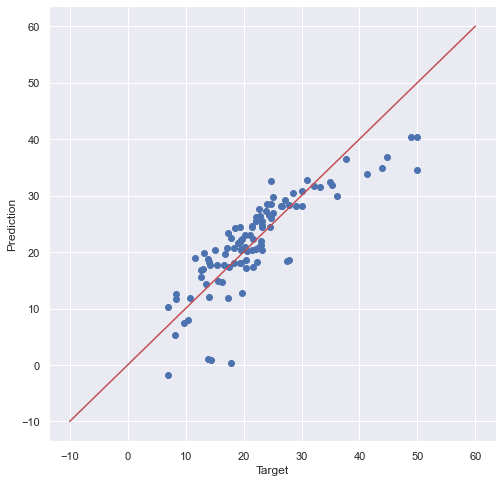

In [33]:
plt.figure(figsize=(8, 8))
linex = np.arange(-10,61)
plt.plot(linex,linex,'r')
plt.scatter(Y_test,y_test_predict)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.show();

In [22]:
# This time let's use PTRATIO too
# Preparing the data for training the model
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['PTRATIO']], columns = ['LSTAT','RM','PTRATIO'])
Y = boston['MEDV']

The model performance for training set
--------------------------------------
RMSE is 5.30386319330793
R2 score is 0.6725214335656512


The model performance for testing set
--------------------------------------
RMSE is 4.913937534764081
R2 score is 0.6915878280744173


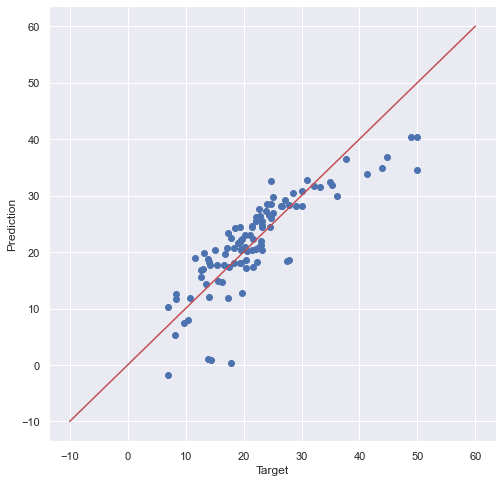

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
# Model evaluation
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

plt.figure(figsize=(8, 8))
linex = np.arange(-10,61)
plt.plot(linex,linex,'r')
plt.scatter(Y_test,y_test_predict)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.show();

## Linear Regression with Numpy's Linear Algebra
Reference: https://numpy.org/doc/stable/reference/routines.linalg.html#module-numpy.linalg

### Training

In [24]:
from numpy.linalg import inv
# let's get our LR coefficients
beta = np.dot(inv(np.dot(X_train.T,X_train)), np.dot(X_train.T,Y_train))
# let's make some prediction on our TRAINING DATA
Y_train_predict = np.dot(X_train, beta)
print(beta)

[-0.55260131  6.11821223 -0.4893787 ]


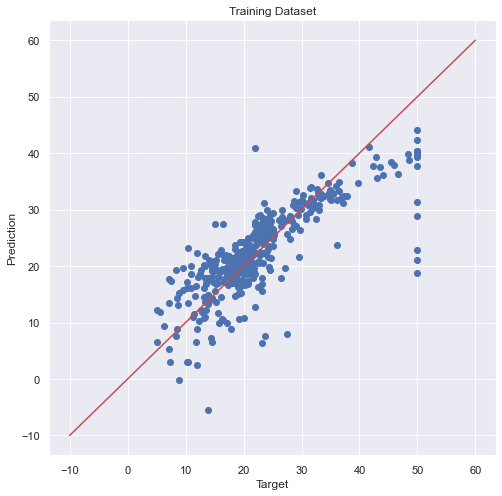

In [29]:
plt.figure(figsize=(8, 8))
linex = np.arange(-10,61)
plt.plot(linex,linex,'r')
plt.scatter(Y_train,Y_train_predict)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Training Dataset')
plt.show();

In [30]:
rmse = (np.sqrt(mean_squared_error(Y_train,Y_train_predict)))
r2 = r2_score(Y_train,Y_train_predict)

print("The model performance for TRAINING set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for TRAINING set
--------------------------------------
RMSE is 5.490047546835406
R2 score is 0.6491265839861875


### Testing

In [27]:
Y_test_predict = np.dot(X_test,beta)

rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 4.681255402947976
R2 score is 0.7201038534654297


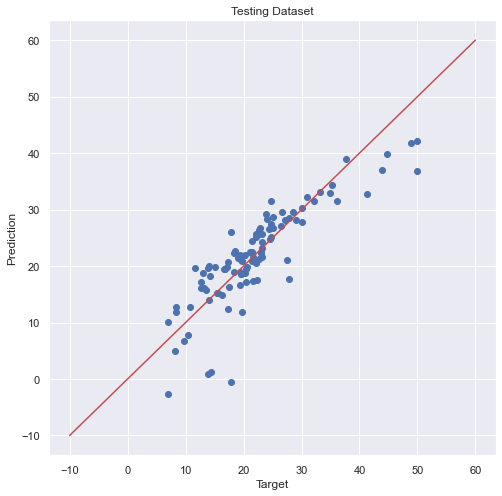

In [31]:
plt.figure(figsize=(8, 8))
linex = np.arange(-10,61)
plt.plot(linex,linex,'r')
plt.scatter(Y_test,Y_test_predict)
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('Testing Dataset')
plt.show();

# Notebook End